In [1]:
#importing the important libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df1=pd.read_csv('previous_application.csv')
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Description of data
<ol>
<li>df refers to  'application_data.csv'  --> which  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.</li>

<li>df1 refers to   'previous_application.csv' --> which contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.  </li>
</ol>

In [4]:
# lets check the data first
print(f'shape of application_data {df.shape}')
print(f'shape of privious_application_data {df1.shape}')

shape of application_data (307511, 122)
shape of privious_application_data (1670214, 37)


<li>application data contain around 30k rows and 122 columns </li>
<li>privious_application_data  contain around 167k rows and 37 columns </li>

# Data Cleaning and  preparation

<li>first check application data</li>

In [5]:
##lets check the missing values 
(df.isna().sum()/df.shape[0])*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [6]:
##lets make a dataframe named missing_val_per which contain the percentage of missing values for each columns for 
missing=((df.isna().sum()/df.shape[0])*100)
missing_val_per=pd.DataFrame(missing,columns=['percentage']).reset_index().sort_values('percentage',ascending=False)
#here i just change the column name from index to categories
missing_val_per.columns = missing_val_per.columns.str.replace('index', 'categories')
missing_val_per.sort_values('percentage')

,categories,percentage
0,SK_ID_CURR,0.000000
106,FLAG_DOCUMENT_12,0.000000
113,FLAG_DOCUMENT_19,0.000000
112,FLAG_DOCUMENT_18,0.000000
111,FLAG_DOCUMENT_17,0.000000
...,...,...
56,NONLIVINGAPARTMENTS_AVG,69.432963
70,NONLIVINGAPARTMENTS_MODE,69.432963
62,COMMONAREA_MODE,69.872297
48,COMMONAREA_AVG,69.872297


#### observation 
<li>so many columns having more then 40% missing values ..so lets drop those columns for better analysis</li>

In [7]:
#lets make a list of those columns names which have more then 47% missing values
more_then_40per_missing=missing_val_per[missing_val_per.percentage>40]['categories'].unique()
more_then_40per_missing

array(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATI

In [8]:
#drop those columns
for i in more_then_40per_missing:
    df.drop(i,axis=1,inplace=True)
df.shape

(307511, 73)

#### so priviously we have 122 columns in application_data now we have 73 columns

In [9]:
# now lets analyse those columns which have less then 40% and more then 0%(means no null values) null values
#lets make a dataframe for those columns only and named the dataframe as resolved_category
resolve_categories=missing_val_per[missing_val_per.percentage>0][missing_val_per.percentage<40]
print(resolve_categories)
print()
print(f'Now we have to sort out these {len(resolve_categories)} columns')

                     categories  percentage
28              OCCUPATION_TYPE   31.345545
43                 EXT_SOURCE_3   19.825307
116  AMT_REQ_CREDIT_BUREAU_HOUR   13.501631
117   AMT_REQ_CREDIT_BUREAU_DAY   13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK   13.501631
119   AMT_REQ_CREDIT_BUREAU_MON   13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT   13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR   13.501631
11              NAME_TYPE_SUITE    0.420148
91     OBS_30_CNT_SOCIAL_CIRCLE    0.332021
92     DEF_30_CNT_SOCIAL_CIRCLE    0.332021
93     OBS_60_CNT_SOCIAL_CIRCLE    0.332021
94     DEF_60_CNT_SOCIAL_CIRCLE    0.332021
42                 EXT_SOURCE_2    0.214626
10              AMT_GOODS_PRICE    0.090403
9                   AMT_ANNUITY    0.003902
29              CNT_FAM_MEMBERS    0.000650
95       DAYS_LAST_PHONE_CHANGE    0.000325

Now we have to sort out these 18 columns


#### Lets start analyse these 18 columns 

In [10]:
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

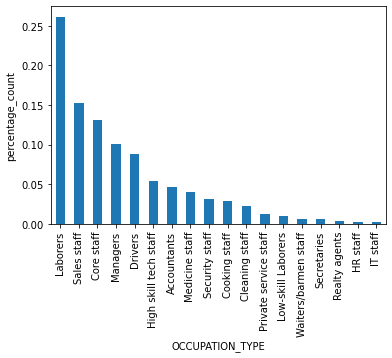

In [11]:
df.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('percentage_count')
plt.show()

In [12]:
(df.OCCUPATION_TYPE.isnull().sum()/df.shape[0])*100

31.345545362604916

#### observation 
<li>OCCUPATION_TYPE is a categorical column </li>
<li>which have around 32%  missing or null values </li>
<li>so we cant directly drop these row because if we do that the 32% of data will be gone </li>
<li>we can't impute those missing values to the mode of that column,because we there is more then 30% missing values and we exactly cant't guess the occupation type</li>
<li>so lets impute those missing values as missing </li>


In [13]:
# impute missing values as 'Missing'
df.OCCUPATION_TYPE.fillna('Missing',inplace=True)

In [14]:
#lets analyse gender column from application_data 
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<li>4 rows are missing so lets drop them </li>

In [15]:
df=df[~(df['CODE_GENDER']=='XNA')]

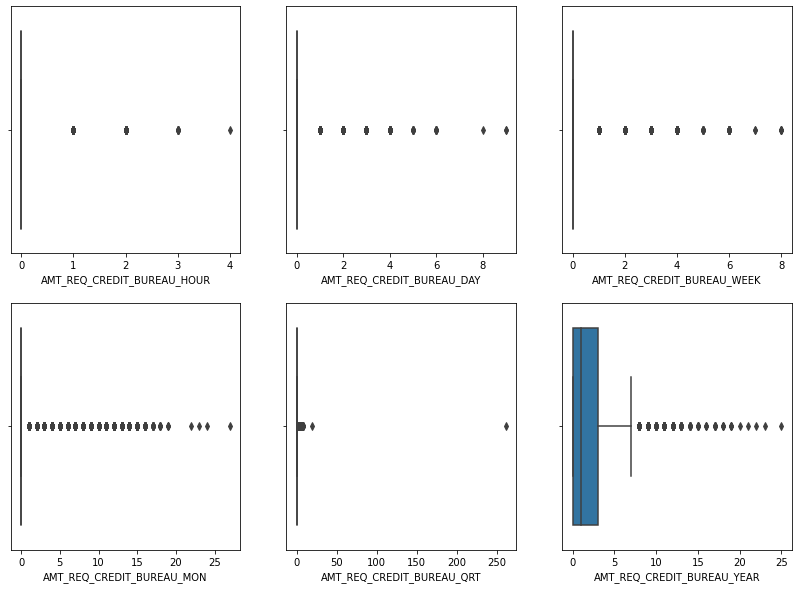

In [16]:
# lets now sort out these columns 
amount_req=['AMT_REQ_CREDIT_BUREAU_HOUR',
           'AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT',
           'AMT_REQ_CREDIT_BUREAU_YEAR']
#these are numerical columns 
# so lets make boxplot for all these columns and see how the outliers are behaving for each those columns 
# and find a better way to handle those missing values  
fig, ax = plt.subplots(2,3, figsize = (14,10))
counter=0
for i in amount_req:
    trace_x = counter // 3
    trace_y = counter % 3
    sns.boxplot(i,ax=ax[trace_x, trace_y],data=df)
    counter += 1
plt.show() 


### observation 
<li>we can clearly saw that the outliers are in contineous format so we can't drop them </li>
<li>but for AMT_REQ_CREDIT_BUREAU_QRT there some outlier so detached from the body so lets cap those outliers for better analysis</li>


In [17]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265988.000000
mean          0.265474
std           0.794060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [18]:
#cap this column to 99 percentile 
df=df[~(df.AMT_REQ_CREDIT_BUREAU_QRT>200)]

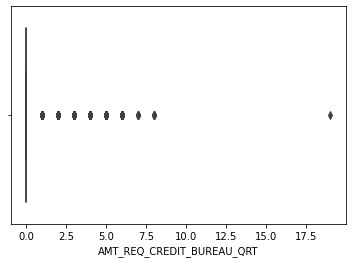

In [19]:
#now lets again check AMT_REQ_CREDIT_BUREAU_QRT 
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

<li>now the outliers are contineous</li>

### observation
<li>all those columns have around 13% null values</li>
<li>impute them to the median values of those perticular column</li>

In [20]:

df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)

df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)

df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)

df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace=True)

df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)

df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)

In [21]:
df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131111
Spouse, partner    0.037131
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [22]:
(df.NAME_TYPE_SUITE.isnull().sum()/df.shape[0])*100

0.420154403491314

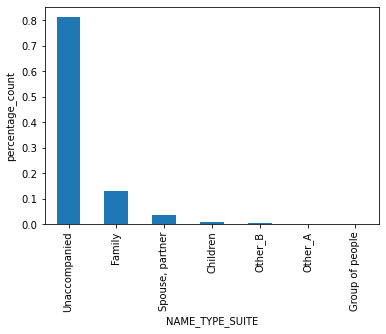

In [23]:
df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xlabel('NAME_TYPE_SUITE')
plt.ylabel('percentage_count')
plt.show()

#### observation 
<li>NAME_TYPE_SUITE is a categorical column </li>
<li>which have around 0.4%  missing or null values </li>
<li>so lets impute those missing values with the mode of this column</li>


In [24]:
# impute null values with mode()
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [25]:
#crosscheck is there any null value present or not
df.NAME_TYPE_SUITE.isnull().sum()

0

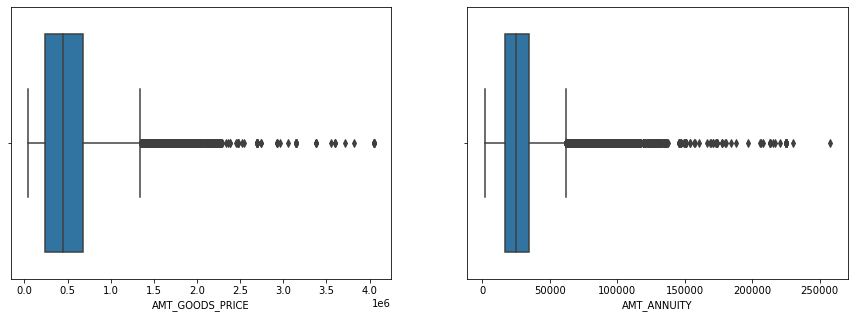

In [26]:
#lets now check these columns 'AMT_GOODS_PRICE','AMT_ANNUITY'
#lets plot boxplot for all these columns name and see how the outliers are behaving 
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x='AMT_GOODS_PRICE'  ,data=df, ax=ax[0])
sns.boxplot(x='AMT_ANNUITY',data=df,ax=ax[1])
plt.show()

#### observation 
<li>these are numericals columns</li>
<li>outliers are in contineous format so we can't directly delect those</li>
<li>so leave them as it is </li>


In [27]:
#these columns having so less null values so lets impute the null values as the mean or median value of that corresponding column
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.mean(),inplace=True)
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mean(),inplace=True)

In [28]:
#Now lets check this column --> 'CNT_FAM_MEMBERS'
df.CNT_FAM_MEMBERS.isnull().sum()

2

In [29]:
df.CNT_FAM_MEMBERS.dtypes

dtype('float64')

### observation
<li>family members cant be in float so lets change the dtype to int and impute the null values to 0</li>

In [30]:
#impute missing values with 0
df.CNT_FAM_MEMBERS.fillna(0,inplace=True)
#change dtype
df.CNT_FAM_MEMBERS=df.CNT_FAM_MEMBERS.astype(int)


In [31]:
#lets check 'DAYS_LAST_PHONE_CHANGE'
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [32]:
#impte with 0
df.DAYS_LAST_PHONE_CHANGE.fillna(0,inplace=True) 

In [33]:
# now lets hendel the missing values of these columns
print(df.isnull().sum()[42:46])

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64


In [34]:
df[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].median()

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

### observation
<li>we can impute the missing values with 0 because thats the median value for all these columns</li>

In [35]:
df[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']]=df[['OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE']].fillna(0)

In [36]:
#now we left with two columns 'EXT_SOURCE_3' and 'EXT_SOURCE_2'
#lets hendel them
#EXT_SOURCE_3 have 19% null values 
#EXT_SOURCE_2 have 0.2% null values
#lets impute them with the mean() values
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_3.mean(),inplace=True)
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.mean(),inplace=True)

In [37]:
#so now we successfully handel the null values of all the columns in application_data 
df.isnull().sum().sum()

0

### Now lets handel  the missing values of previous_application data

In [38]:
##lets make a dataframe named missing_val_per which contain the percentage of missing values for 
## each columns in previous_application data
missings_df1=pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100,columns=['percentage'])
missing_per_df1=missings_df1.reset_index()
missing_per_df1.columns = missing_per_df1.columns.str.replace('index', 'categories')
print(missing_per_df1.sort_values('percentage',ascending=False))

                     categories  percentage
14     RATE_INTEREST_PRIVILEGED   99.643698
13        RATE_INTEREST_PRIMARY   99.643698
6              AMT_DOWN_PAYMENT   53.636480
12            RATE_DOWN_PAYMENT   53.636480
20              NAME_TYPE_SUITE   49.119754
36    NFLAG_INSURED_ON_APPROVAL   40.298129
35             DAYS_TERMINATION   40.298129
34                DAYS_LAST_DUE   40.298129
33    DAYS_LAST_DUE_1ST_VERSION   40.298129
32               DAYS_FIRST_DUE   40.298129
31           DAYS_FIRST_DRAWING   40.298129
7               AMT_GOODS_PRICE   23.081773
3                   AMT_ANNUITY   22.286665
28                  CNT_PAYMENT   22.286366
30          PRODUCT_COMBINATION    0.020716
5                    AMT_CREDIT    0.000060
29             NAME_YIELD_GROUP    0.000000
23               NAME_PORTFOLIO    0.000000
27         NAME_SELLER_INDUSTRY    0.000000
26             SELLERPLACE_AREA    0.000000
25                 CHANNEL_TYPE    0.000000
24            NAME_PRODUCT_TYPE 

### observation
<li>some columns have 99% missing values so we can simply drop them </li>
<li>some columns are similar with application data columns like 'AMT_GOODS_PRICE','AMT_ANNUITY' etc . we have to check them first</li>
<li>some columns having so less missing values percentage like 'PRODUCT_COMBINATION','AMT_CREDIT' so we can simply get rid of that rows </li>


In [39]:
#drop the columns which have more then 99%  missing values
df1.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'], inplace=True, axis=1)

In [40]:
#drop the rows of these columns because they have so less missing values
df1=df1[~df1['PRODUCT_COMBINATION'].isna()]
df1=df1[~df1['AMT_CREDIT'].isna()]

In [41]:
#lets check 'NAME_TYPE_SUITE' column 
#it has around 50% data missing 
#but this column looks so intresting so we can't drop this column 
## instead of what we can do is lets impute the null values as 'Missing'
df1.NAME_TYPE_SUITE=df1.NAME_TYPE_SUITE.fillna('Missing')

In [42]:
## now lets check these columns 
a=['DAYS_FIRST_DRAWING',
'DAYS_FIRST_DUE',
'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE',
'DAYS_TERMINATION',
'NFLAG_INSURED_ON_APPROVAL']
## these columns are more then 40% data are missing 
## and dont look so helpfull for analysis perpose 
## so lets drop them
for i in a:
    df1[i].fillna(df1[i].median(),inplace=True)

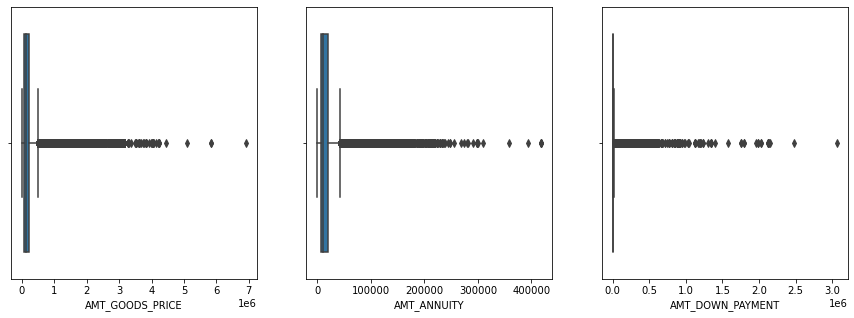

In [43]:
## lets draw boxplot for 'AMT_GOODS_PRICE','AMT_ANNUITY','AMT_DOWN_PAYMENT' these columns and see how the outliers are behaving
fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(x='AMT_GOODS_PRICE'  ,data=df1, ax=ax[0])
sns.boxplot(x='AMT_ANNUITY',data=df1,ax=ax[1])
sns.boxplot(x='AMT_DOWN_PAYMENT',data=df1,ax=ax[2])
plt.show()

In [44]:
## lets see the percentile of these columns 
print(df1.AMT_GOODS_PRICE.quantile([0.50,0.75,0.95,0.99,1]))
print()
print(df1.AMT_ANNUITY.quantile([0.50,0.75,0.95,0.99,1]))
print()
print(df1.AMT_DOWN_PAYMENT.quantile([0.99,1]))

0.50     112320.0
0.75     234000.0
0.95     900000.0
0.99    1395000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

0.50     11250.0000
0.75     20658.4200
0.95     45336.7800
0.99     69685.8174
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

0.99      65930.895
1.00    3060045.000
Name: AMT_DOWN_PAYMENT, dtype: float64


### observation
<li>the percentile between 0.99 and 1 is so high for those column so lets cap them to 0.99quantile </li>

In [45]:
df1=df1[~(df1.AMT_ANNUITY>df1.AMT_ANNUITY.quantile(0.99))]
df1=df1[~(df1.AMT_DOWN_PAYMENT>df1.AMT_DOWN_PAYMENT.quantile(0.99))]
df1=df1[~(df1.AMT_GOODS_PRICE>df1.AMT_GOODS_PRICE.quantile(0.99))]

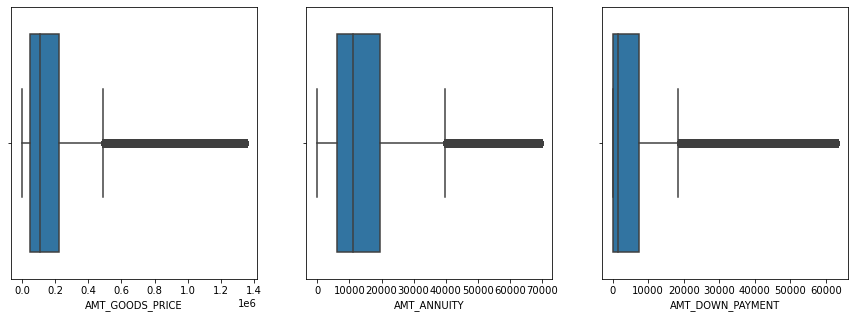

In [46]:
##### now lets sew how the outliers are behaving now
fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(x='AMT_GOODS_PRICE'  ,data=df1, ax=ax[0])
sns.boxplot(x='AMT_ANNUITY',data=df1,ax=ax[1])
sns.boxplot(x='AMT_DOWN_PAYMENT',data=df1,ax=ax[2])
plt.show()

### observation
<li>now the outliers are are in contineous format </li>

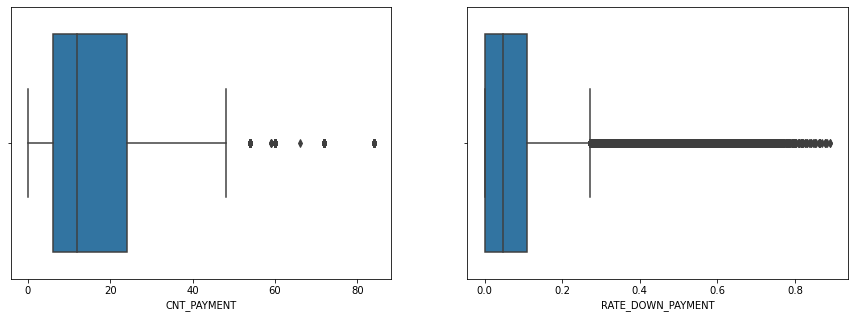

In [47]:
## now let's analyse 'CNT_PAYMENT','RATE_DOWN_PAYMENT'
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x='CNT_PAYMENT'  ,data=df1, ax=ax[0])
sns.boxplot(x='RATE_DOWN_PAYMENT',data=df1,ax=ax[1])
plt.show()

### observation
<li>outliers for these columns are so contineous so we can't delet them so just leave them as it is</li>

## Data Analysis

<li>lets start from application_data</li>

In [48]:
## lets see how many numirical and object type columns are in application_data

df_object_data=df.select_dtypes(include=['object']).columns
df_numerical_data=df.select_dtypes(include=['int','float']).columns
print('These are object data type columns-->')
print(df_object_data)
print('*'*100)
print('These are numerical type columns-->')
print(df_numerical_data)

These are object data type columns-->
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')
****************************************************************************************************
These are numerical type columns-->
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
  

In [49]:
#'ORGANIZATION_TYPE' column have some missing values named as 'XNA' so replace them as 'MISSING'
df.ORGANIZATION_TYPE=df.ORGANIZATION_TYPE.replace('XNA','MISSING')

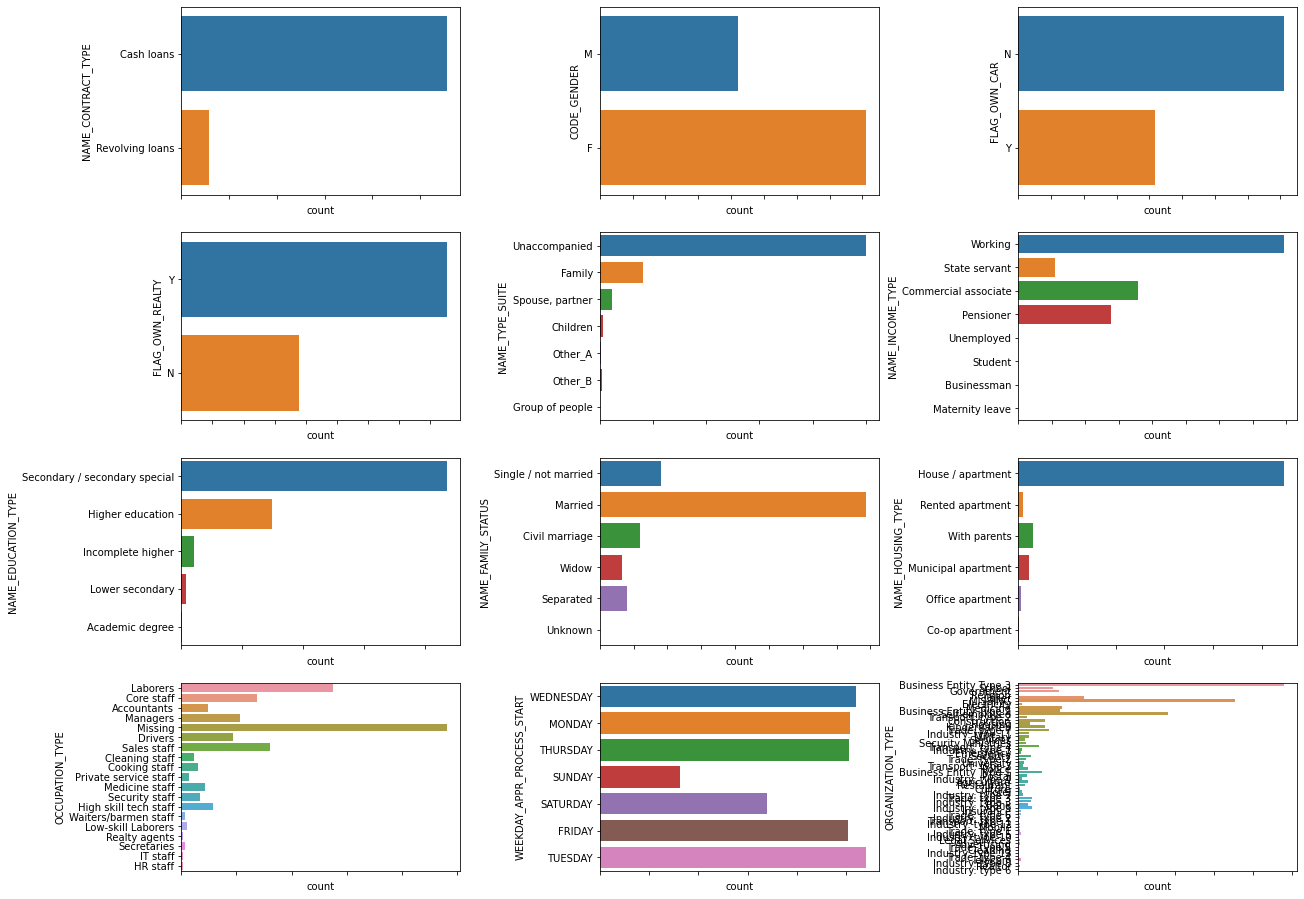

In [50]:
### lets analyse all the object type columns in one plot using the help of subplot
fig, ax = plt.subplots(4,3, figsize = (20,15))
counter=0
for i in df_object_data:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(y=i,ax=ax[trace_x, trace_y],data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
    counter += 1

plt.show()

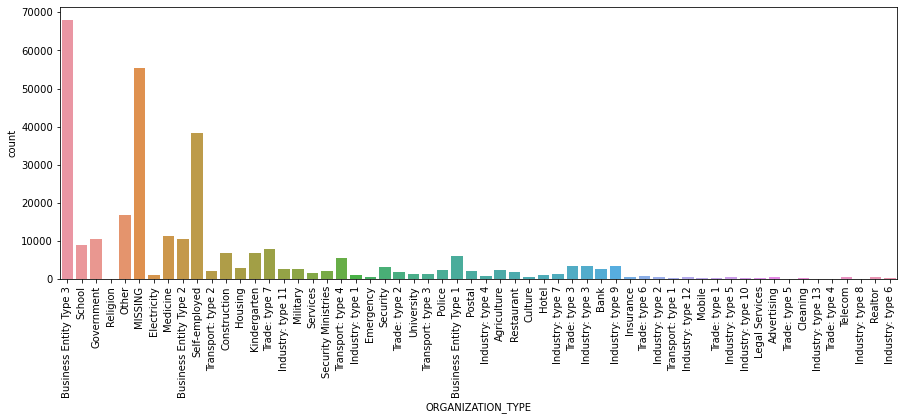

In [51]:
## from these all subplots 'ORGANIZATION_TYPE' was not clearly visible so lets draw that separetly
plt.figure(figsize=[15,5])
sns.countplot(data=df,x='ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.show()

### observation
<ol>
<li>'cash loans' contract type is more then 'revolving loans'</li>
<li>females are taking more loans then males</li>
<li>There are more clients who don't have cars </li>
<li>There are more clients having house or flat</li>
<li>There are  more  'married' clints</li>
<li>The income type is mostly ''working' and 'commercial associate'</li>
<li>'NAME_TYPE_SUITE' is mostly 'Unaccompanied' means clients applying the loan on there own</li>
<li>Education type is mostly 'secondary/secondary special' of the clients</li>
<li>most of the clients living on there apartment/house  </li>
<li>most occupation type of clients are 'Laborers' followed by 'sales staff','core staff','managers'</li>
<li>ORGANIZATION_TYPE of most clients was 'Business Entity Type 3' followed by 'Self-employed' ,'Other','Medicine'</li>

</ol>

### BIVARIATE ANALYSIS

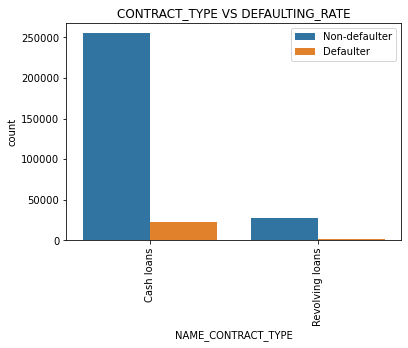

CONTRACT_TYPE VS DEFAULTING_RATE
             value  percentage_defaulting
0       Cash loans               8.345943
1  Revolving loans               5.479078


In [52]:

## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='NAME_CONTRACT_TYPE'  ,data=df, hue='TARGET')
plt.title('CONTRACT_TYPE VS DEFAULTING_RATE')
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.xticks(rotation=90)
plt.show()



#### define a function to give percentage of dedaulting rate  for each category
def per_defaulting(x):
    ## in  the position of x give the name of column  in parenthesis which you want to analyse
    value=[]
    percentage_defaulting=[]
    for i in df[x].unique():
        percentage_defaulting.append((df[(df[x]==i)&(df.TARGET==1)].shape[0])/(df[(df[x]==i)].shape[0])*100)
        value.append(i)
    print(pd.DataFrame({'value':value,'percentage_defaulting':percentage_defaulting}))

### also lets see what is the overall defaulting rate in each category
print('CONTRACT_TYPE VS DEFAULTING_RATE')
per_defaulting('NAME_CONTRACT_TYPE')

### observation
<li>those  who are taking cash loans type defaulting more then revolving loans,but still the difference was not so high so this column don't give us so much insight about defaulters</li>

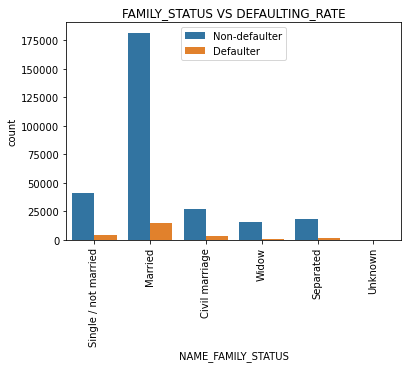

FAMILY_STATUS VS DEFAULTING_RATE
                  value  percentage_defaulting
0  Single / not married               9.807675
1               Married               7.560022
2        Civil marriage               9.944918
3                 Widow               5.824217
4             Separated               8.194234
5               Unknown               0.000000


In [53]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='NAME_FAMILY_STATUS'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('FAMILY_STATUS VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('FAMILY_STATUS VS DEFAULTING_RATE')
per_defaulting('NAME_FAMILY_STATUS')

### observation
<li>'single/not married' and 'civil marriage' clients are defaulting more</li>
<li>'married clients' are more intrested  to take loan and also there defaulting percentage was low as compare to 'single/not married' and 'civil' marriage familt_status type</li>

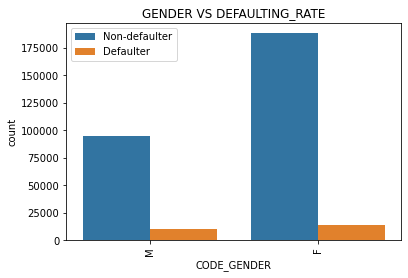

GENDER VS DEFAULTING_RATE
  value  percentage_defaulting
0     M              10.141920
1     F               6.999363


In [54]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='CODE_GENDER'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('GENDER VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('GENDER VS DEFAULTING_RATE')
per_defaulting('CODE_GENDER')

### observation
<li>Females are more intrested to taking loans and there overall defaulting rate was less as compare to males</li>
<li>On the other hand males are defaulting more then females </li>

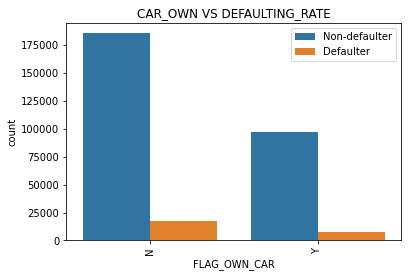

CAR_OWN VS DEFAULTING_RATE
  value  percentage_defaulting
0     N               8.500352
1     Y               7.243869


In [55]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='FLAG_OWN_CAR'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('CAR_OWN VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('CAR_OWN VS DEFAULTING_RATE')
per_defaulting('FLAG_OWN_CAR')

### Observation 
<li>those who dont have cars are more intrested to taking loan and also there defaulting rate was more then the clients who have car</li>

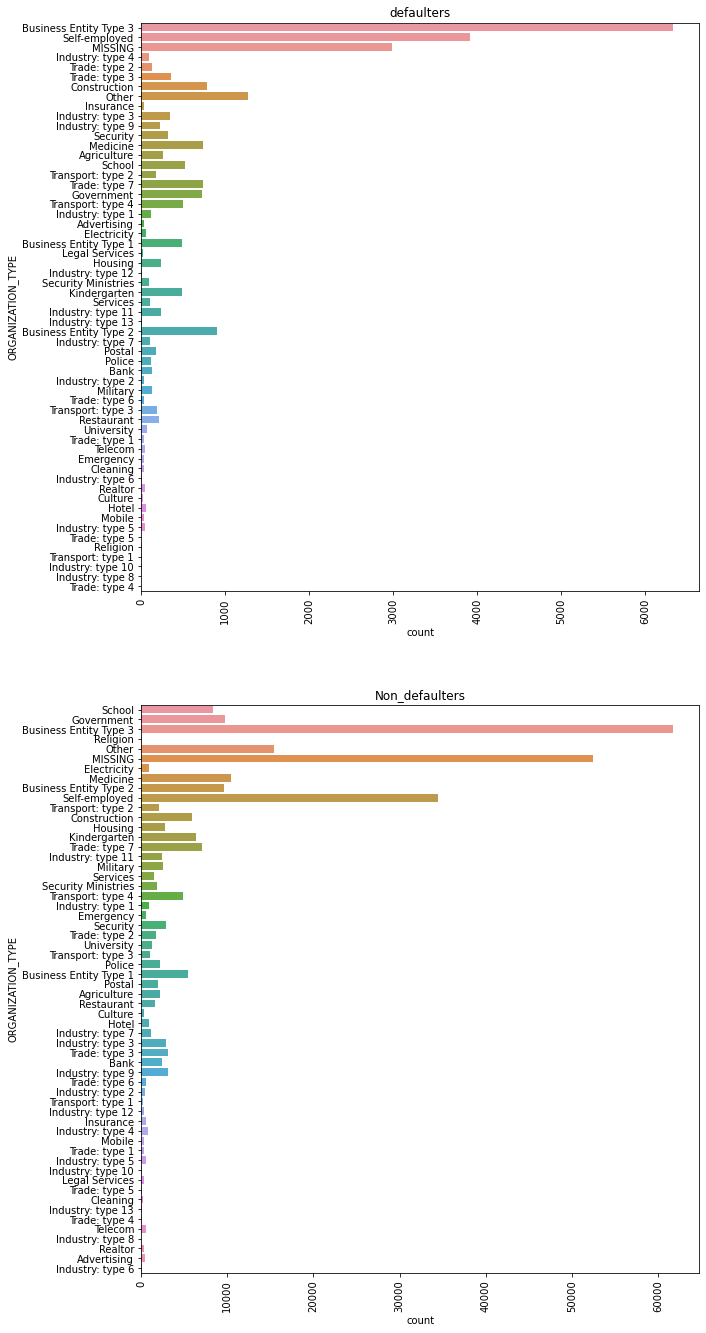

ORGANIZATION_TYPE VS DEFAULTING_RATE
*****Top 10 defaulters******
                value  percentage_defaulting
25  Transport: type 3              15.754002
52  Industry: type 13              13.432836
55   Industry: type 8              12.500000
31         Restaurant              11.706240
11       Construction              11.679810
51           Cleaning              11.153846
20   Industry: type 1              11.068335
36   Industry: type 3              10.619469
56            Realtor              10.606061
30        Agriculture              10.472698

*****Bottom  10 defaulters******
                  value  percentage_defaulting
5               MISSING               5.399646
37                 Bank               5.185481
16             Military               5.125285
26               Police               4.997864
24           University               4.898267
18  Security Ministries               4.863222
40        Trade: type 6               4.595880
42    Transport: type 1      

In [56]:
defaulter=df[df['TARGET']==1]
non_defaulter=df[df['TARGET']==0]


plt.figure(figsize=[10,23])
plt.subplot(2,1,1)
sns.countplot(y='ORGANIZATION_TYPE'  ,data=defaulter)
plt.xticks(rotation=90)
plt.title('defaulters')


plt.subplot(2,1,2)
sns.countplot(y='ORGANIZATION_TYPE'  ,data=non_defaulter)
plt.xticks(rotation=90)
plt.title('Non_defaulters')
plt.show()


value=[]
percentage_defaulting=[]
for i in df.ORGANIZATION_TYPE.unique():
    percentage_defaulting.append((df[(df.ORGANIZATION_TYPE==i)&(df.TARGET==1)].shape[0])/(df[(df.ORGANIZATION_TYPE==i)].shape[0])*100)
    value.append(i)
print('ORGANIZATION_TYPE VS DEFAULTING_RATE')
print('*****Top 10 defaulters******')

data=pd.DataFrame({'value':value,'percentage_defaulting':percentage_defaulting})
print(data.sort_values('percentage_defaulting',ascending=False).head(10))
print()
print('*****Bottom  10 defaulters******')
print(data.sort_values('percentage_defaulting',ascending=False).tail(10))

### observation 
<li> Transport: type 3,Industry: type 13 ,Industry ,Restaurant,Construction,Cleaning,Agriculture,Realtor for these type of ORGANIZATION_TYPE  the defaulting rate is more then 10%</li>




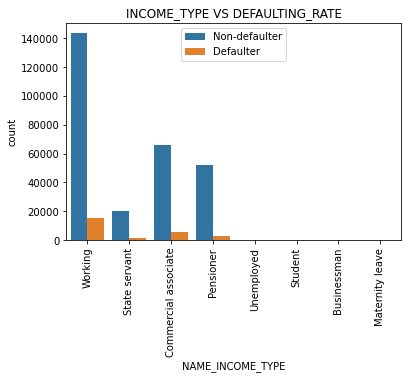

INCOME_TYPE VS DEFAULTING_RATE
                  value  percentage_defaulting
0               Working               9.588713
1         State servant               5.754965
2  Commercial associate               7.484361
3             Pensioner               5.386366
4            Unemployed              36.363636
5               Student               0.000000
6           Businessman               0.000000
7       Maternity leave              40.000000


In [57]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='NAME_INCOME_TYPE'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('INCOME_TYPE VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('INCOME_TYPE VS DEFAULTING_RATE')
per_defaulting('NAME_INCOME_TYPE')

### observation 
<li>clients having income type 'working','Commercial associate','Pensioner' are  more tend to taking the loan and also there defaulting rate was less then 10%</li>
<li>but 'unemployed' and 'Maternity leave' income type clients defaulting rate was so high</li>

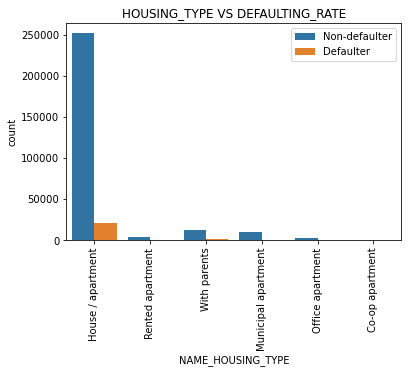

HOUSING_TYPE VS DEFAULTING_RATE
                 value  percentage_defaulting
0    House / apartment               7.795825
1     Rented apartment              12.313051
2         With parents              11.698113
3  Municipal apartment               8.540512
4     Office apartment               6.572411
5      Co-op apartment               7.932264


In [58]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='NAME_HOUSING_TYPE'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('HOUSING_TYPE VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('HOUSING_TYPE VS DEFAULTING_RATE')
per_defaulting('NAME_HOUSING_TYPE')

### observation 
<li>Defaulting rate of 'Rented apartment' type and 'With parents'type are more as compare to other type</li>
<li>most of the clients are living there own apartment/house and there defaulting rate was low as cpmpare to other</li>

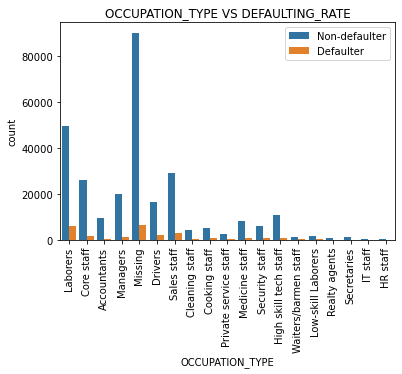

OCCUPATION_TYPE VS DEFAULTING_RATE
                    value  percentage_defaulting
0                Laborers              10.578770
1              Core staff               6.304182
2             Accountants               4.830819
3                Managers               6.214028
4                 Missing               6.513191
5                 Drivers              11.326130
6             Sales staff               9.631799
7          Cleaning staff               9.606705
8           Cooking staff              10.443996
9   Private service staff               6.598793
10         Medicine staff               6.700246
11         Security staff              10.742449
12  High skill tech staff               6.159930
13   Waiters/barmen staff              11.275964
14     Low-skill Laborers              17.160612
15          Realty agents               7.856192
16            Secretaries               7.049808
17               IT staff               6.463878
18               HR staff         

In [59]:
## lets analyse how these categorical columns are behaving with 'TARGET' columns
sns.countplot(x='OCCUPATION_TYPE'  ,data=df, hue='TARGET')
plt.xticks(rotation=90)
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('OCCUPATION_TYPE VS DEFAULTING_RATE')
plt.show()
### also lets see what is the overall defaulting rate in each category
print('OCCUPATION_TYPE VS DEFAULTING_RATE')
per_defaulting('OCCUPATION_TYPE')

### observation
<li>defaulting rate of 'Laborers','Drivers','Cooking staff','Security staff','Waiters/barmen staff','Low-skill Laborers' are more then 10%</li>
<li>on the other hand OCCUPATION_TYPE  like 'Accountants','Managers','IT','HR' defaulting rates are less then 7%</li>

In [60]:
### now let's analyse all nimirical columns one by one
# lets analyse 'DAYS_BIRTH' column which contain the information about clients age in days 
df.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307506, dtype: int64

In [61]:
### observation
## 'DAYS_BIRTH' column is in negetive value so we have to convert it to positive and make a new column 'customer_age'
## and extract year from 'DAYS_BIRTH' column 

df['customer_age']=round(-(df.DAYS_BIRTH)/365)
df['customer_age']=df['customer_age'].astype('int')

## also change the data type to int
## let's make a categorical age column

df['age_category']=pd.cut(df.customer_age,[0,30,40,50,60,150],labels=['<30','30-40','40-50','50-60','60+'])
df['age_category'].value_counts()

30-40    82768
40-50    75509
50-60    67954
<30      48867
60+      32408
Name: age_category, dtype: int64

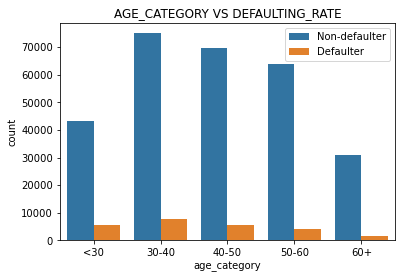

AGE_CATEGORY VS DEFAULTING_RATE
   value  percentage_defaulting
0    <30              11.445352
1  40-50               7.581878
2  50-60               6.036436
3  30-40               9.434806
4    60+               4.924710


In [62]:
sns.countplot(x='age_category',data=df,hue="TARGET")
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.title('AGE_CATEGORY VS DEFAULTING_RATE')
plt.show()
print('AGE_CATEGORY VS DEFAULTING_RATE')
per_defaulting('age_category')

### observation
<li>age less then 30 defaulting more then other age category </li>
<li>age greater then 60 are less defaulter</li>

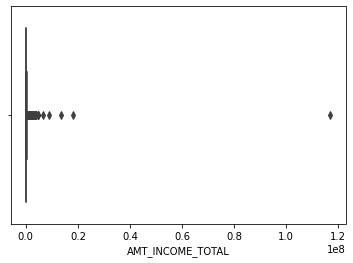

In [63]:
### lets check the column 'AMT_INCOME_TOTAL'
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

In [64]:
## there is a outlier so detached from the body that heavely impact our analysis
##so lets cap the values to 99 percentile 
df=df[~(df.AMT_INCOME_TOTAL>df.AMT_INCOME_TOTAL.quantile(0.99))]

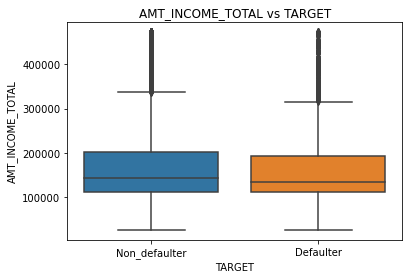

Mean value of Defaulter
165611.76090634443
Mean value of Non_defaulter
169076.79680075773


In [65]:
ax=sns.boxplot(y=df.AMT_INCOME_TOTAL,x=df.TARGET)
ax.set_xticklabels(['Non_defaulter','Defaulter'])
plt.title('AMT_INCOME_TOTAL vs TARGET')
plt.show()


print('Mean value of Defaulter')
print(defaulter['AMT_INCOME_TOTAL'].mean())
print('Mean value of Non_defaulter')
print(non_defaulter['AMT_INCOME_TOTAL'].mean())

### observation
<li>mean of Total Income of defaulters and non defaulters are very much same </li>
<li>This column don't give so much insight for detecting the defaulter</li>

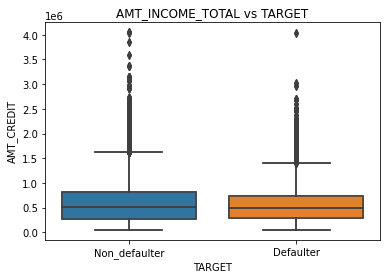

Mean value of Defaulter
557778.527673716
Mean value of Non_defaulter
602649.6288961762


In [66]:
sns.boxplot(y=df.AMT_CREDIT,x=df.TARGET)
ax=sns.boxplot(y=df.AMT_CREDIT,x=df.TARGET)
ax.set_xticklabels(['Non_defaulter','Defaulter'])
plt.title('AMT_INCOME_TOTAL vs TARGET')
plt.show()


print('Mean value of Defaulter')
print(defaulter['AMT_CREDIT'].mean())
print('Mean value of Non_defaulter')
print(non_defaulter['AMT_CREDIT'].mean())

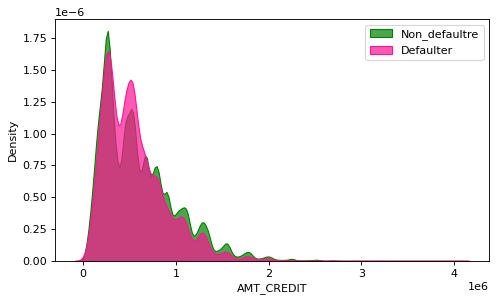

In [67]:
plt.figure(figsize=(7,4), dpi= 80)
sns.kdeplot(df.loc[df['TARGET'] == 0, "AMT_CREDIT"], shade=True, color="g", label="Non_defaultre", alpha=.7)
sns.kdeplot(df.loc[df['TARGET'] == 1, "AMT_CREDIT"], shade=True, color="deeppink", label="Defaulter", alpha=.7)
plt.legend()
plt.show()

### observation
<li>mean of Amount credit of defaulters and non defaulters are very much close to each other </li>
<li>This column don't give so much insight for detecting the defaulter</li>

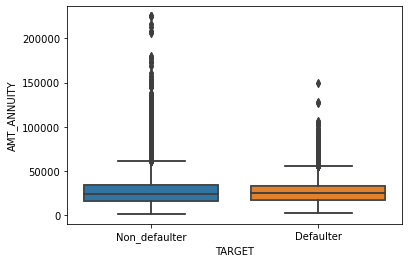

Mean value of Defaulter
26481.744290030212
Mean value of Non_defaulter
27163.711400388653


In [68]:
sns.boxplot(y=df.AMT_ANNUITY,x=df.TARGET)
ax=sns.boxplot(y=df.AMT_ANNUITY,x=df.TARGET)
ax.set_xticklabels(['Non_defaulter','Defaulter'])
plt.show()


print('Mean value of Defaulter')
print(defaulter['AMT_ANNUITY'].mean())
print('Mean value of Non_defaulter')
print(non_defaulter['AMT_ANNUITY'].mean())

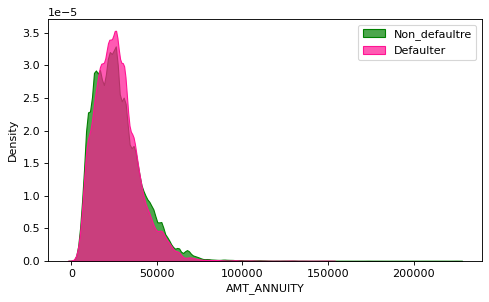

In [69]:
plt.figure(figsize=(7,4), dpi= 80)
sns.kdeplot(df.loc[df['TARGET'] == 0, "AMT_ANNUITY"], shade=True, color="g", label="Non_defaultre", alpha=.7)
sns.kdeplot(df.loc[df['TARGET'] == 1, "AMT_ANNUITY"], shade=True, color="deeppink", label="Defaulter", alpha=.7)
plt.legend()
plt.show()

### observation
<li>mean of Amount annuity of defaulters and non defaulters are very much close to each other but in non defaulter case some clients having AMT_ANNUITY more then 150k</li>
<li>This column don't give so much insight for detecting the defaulter</li>

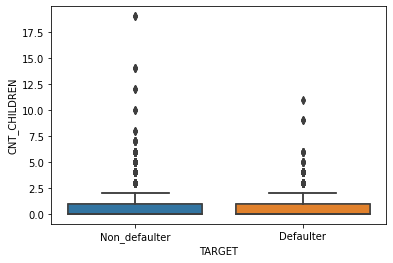

Median children of Defaulter
0.0
Meadian children of Non_defaulter
0.0


In [70]:
sns.boxplot(y=df.CNT_CHILDREN,x=df.TARGET)
ax=sns.boxplot(y=df.CNT_CHILDREN,x=df.TARGET)
ax.set_xticklabels(['Non_defaulter','Defaulter'])
plt.show()


print('Median children of Defaulter')
print(defaulter['CNT_CHILDREN'].median())
print('Meadian children of Non_defaulter')
print(non_defaulter['CNT_CHILDREN'].median())

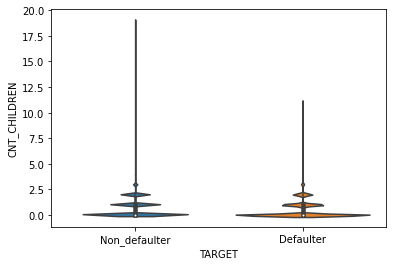

In [71]:
ax=sns.violinplot(y=df.CNT_CHILDREN,x=df.TARGET)
ax.set_xticklabels(['Non_defaulter','Defaulter'])
plt.show()

### observation
<li>most clients have no children in both defaulter and non defaulter category</li>
<li>don't find any useful insight from it</li>

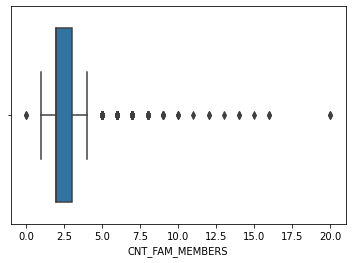

count    304492.000000
mean          2.151482
std           0.910103
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [72]:
##lets analyse the family member category 'CNT_FAM_MEMBERS'
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()
print(df.CNT_FAM_MEMBERS.describe())

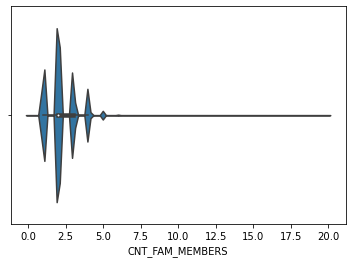

In [73]:
sns.violinplot(df.CNT_FAM_MEMBERS)
plt.show()


value_counts
0-5     303969
5-10       510
10+         11
Name: FAM_MEMBERS_CAT, dtype: int64


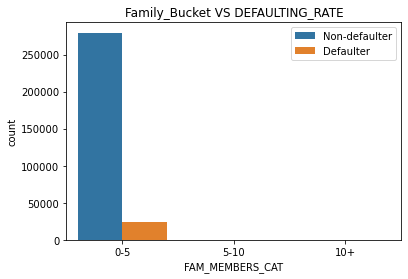

In [74]:
##lates make bucket of family members and see if we can get some insight or not


df['FAM_MEMBERS_CAT']=pd.cut(df.CNT_FAM_MEMBERS,[0,5,10,100],labels=['0-5','5-10','10+'])
print('value_counts')
print(df['FAM_MEMBERS_CAT'].value_counts())

sns.countplot(df['FAM_MEMBERS_CAT'],hue=df.TARGET)
plt.title('Family_Bucket VS DEFAULTING_RATE')
plt.legend( ['Non-defaulter','Defaulter'],loc='best')
plt.show()



### observation
<li>total family members between 0-5 are more likely to taking the loan </li>




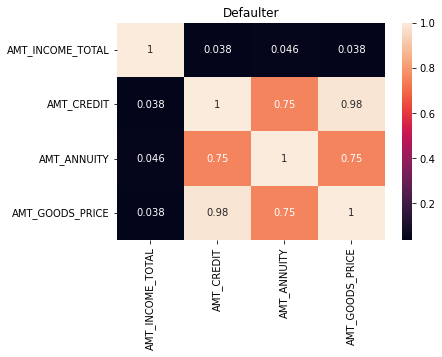

In [75]:
### lets use heatmap and scatter plot to analyse these columns and find the correlations between them
sns.heatmap(defaulter[[ 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(),annot=True)
plt.title('Defaulter')
plt.show()

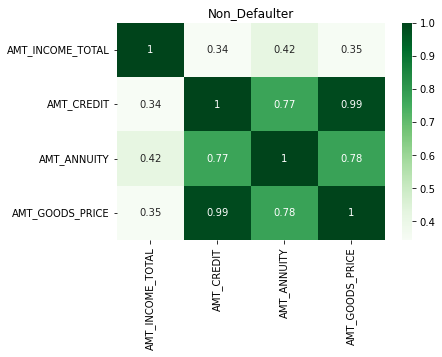

In [76]:
sns.heatmap(non_defaulter[[ 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(),annot=True,cmap='Greens')
plt.title('Non_Defaulter')
plt.show()

## MULTIVARIATE ANALYSIS

##### OCCUPATION_TYPE vs CODE_GENDER  vs Target

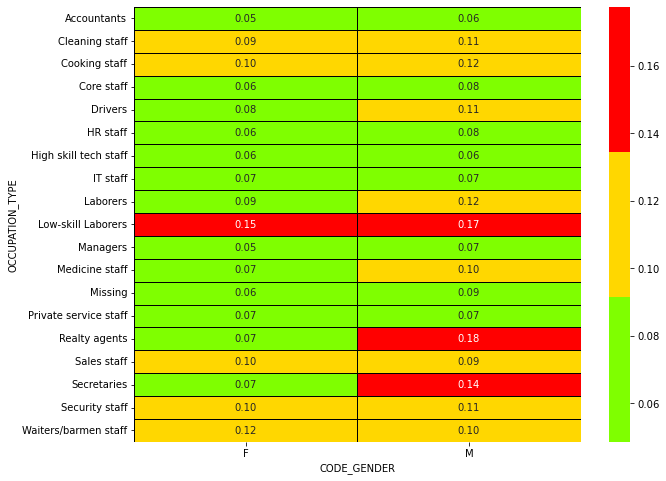

In [77]:
my_colors = ['chartreuse', 'gold', 'r']
plt.figure(figsize=(10,8))
a=pd.pivot_table(data=df,index='OCCUPATION_TYPE',columns='CODE_GENDER',values='TARGET')
sns.heatmap(a,annot=True,linewidth=1,linecolor='black',fmt='.2f',cmap=my_colors)
plt.show()

##### OCCUPATION_TYPE vs HOUSING_TYPE  vs Target

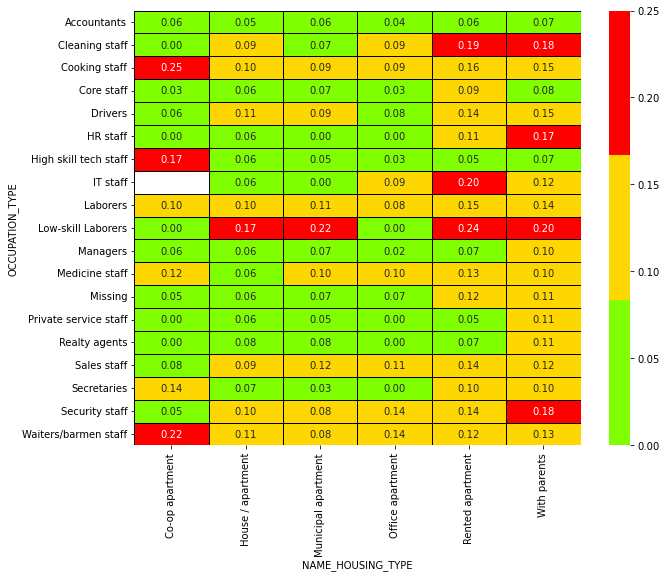

In [78]:
my_colors = ['chartreuse', 'gold', 'r']
plt.figure(figsize=(10,8))
a=pd.pivot_table(data=df,index='OCCUPATION_TYPE',columns='NAME_HOUSING_TYPE',values='TARGET')
sns.heatmap(a,cmap=my_colors,annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.show()

##### OCCUPATION_TYPE vs age_category  vs Target

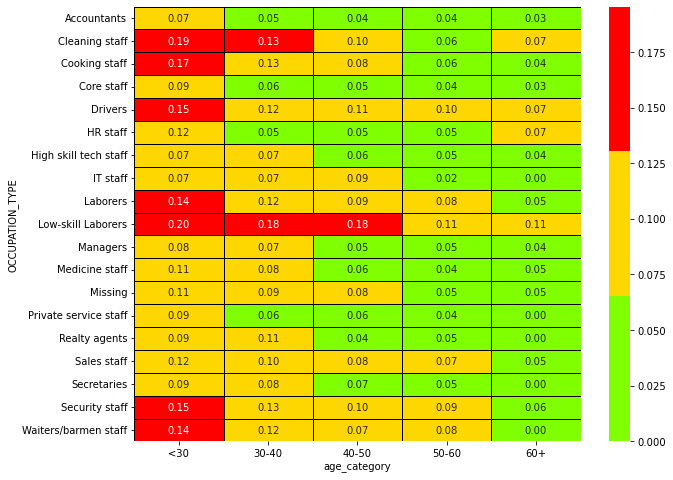

In [79]:
plt.figure(figsize=(10,8))
a=pd.pivot_table(data=df,index='OCCUPATION_TYPE',columns='age_category',values='TARGET',aggfunc='mean')
sns.heatmap(a,cmap=my_colors,annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.show()

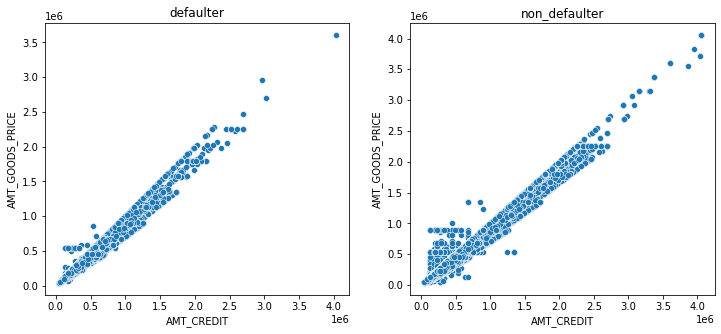

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('defaulter')
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=defaulter)

plt.subplot(1,2,2)
plt.title('non_defaulter')
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=non_defaulter)

plt.show()

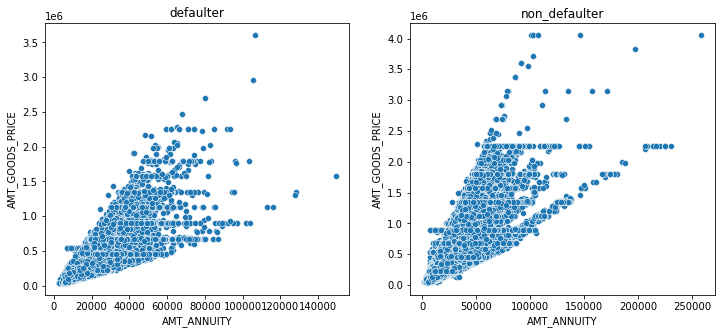

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('defaulter')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=defaulter)

plt.subplot(1,2,2)
plt.title('non_defaulter')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=non_defaulter)

plt.show()

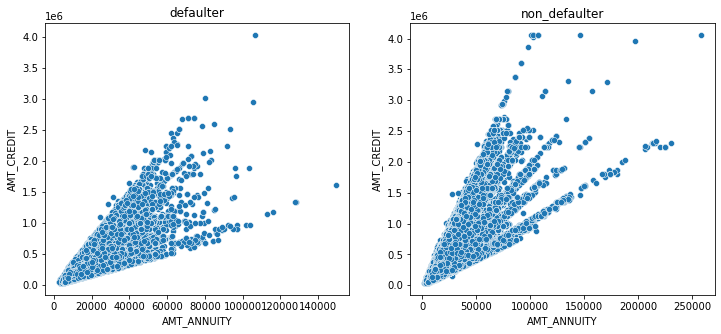

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('defaulter')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=defaulter)

plt.subplot(1,2,2)
plt.title('non_defaulter')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT',data=non_defaulter)

plt.show()

### observation
#### top 3 correlation of defaulters 
<li>AMT_CREDIT and AMT_GOODS_PRICE are  highly positive  correlated</li>
<li>AMT_ANNUITY and AMT_GOODS_PRICE are also positively correlated</li>
<li>AMT_CREDIT and AMT_ANNUITY are positively correlated</li>

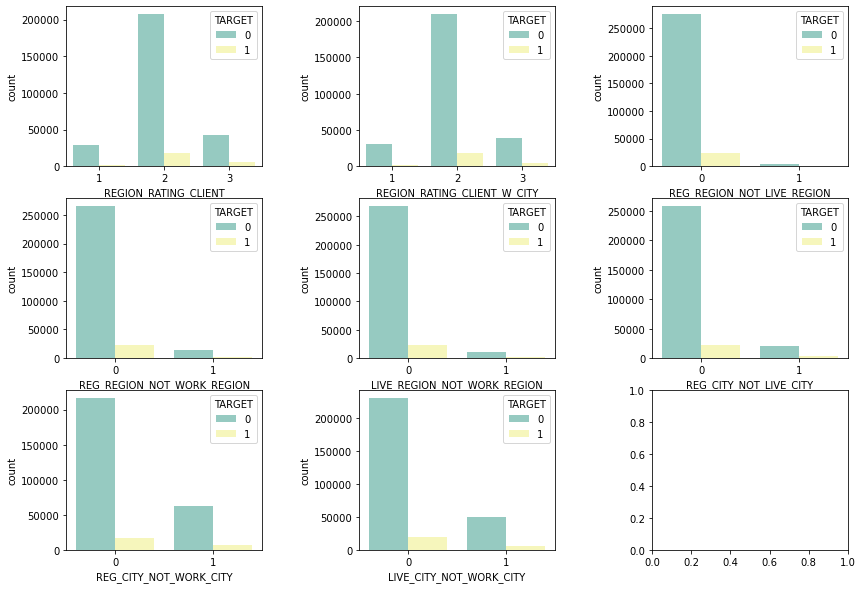

In [83]:
### let's see how these columns are behaving 
a=[ 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
### make subplots for each of these column vs defaulting rate
fig, ax = plt.subplots(3,3, figsize = (14,10))
counter=0
for i in a:
    trace_x = counter // 3
    trace_y = counter % 3
    sns.countplot(df[i],hue=df.TARGET,ax=ax[trace_x, trace_y],palette="Set3")
    counter += 1
plt.subplots_adjust( wspace=0.5)
plt.show()

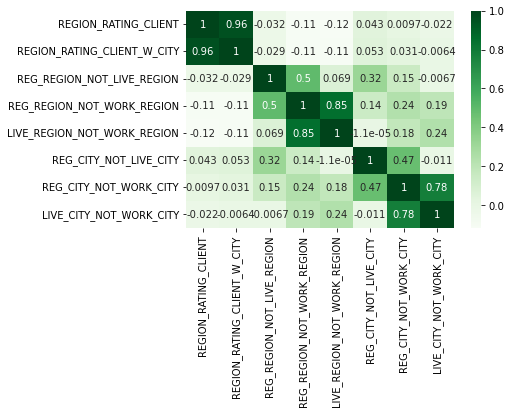

In [84]:
sns.heatmap(defaulter[a].corr(),cmap='Greens',annot=True)
plt.show()

### observation
#### top 3 correlation for defaulters 
<li>REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT was highly positively correlated</li>
<li>LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION was highly positively correlated</li>
<li>LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY was highly positively correlated</li>

In [85]:
for i in a:
    print(f'{i} vs defaulting rate')
    per_defaulting(i)
    print()

REGION_RATING_CLIENT vs defaulting rate
   value  percentage_defaulting
0      2               7.896721
1      1               4.866928
2      3              11.130753

REGION_RATING_CLIENT_W_CITY vs defaulting rate
   value  percentage_defaulting
0      2               7.924505
1      1               4.888591
2      3              11.431582

REG_REGION_NOT_LIVE_REGION vs defaulting rate
   value  percentage_defaulting
0      0               8.079781
1      1               9.422694

REG_REGION_NOT_WORK_REGION vs defaulting rate
   value  percentage_defaulting
0      0               8.050557
1      1               9.038132

LIVE_REGION_NOT_WORK_REGION vs defaulting rate
   value  percentage_defaulting
0      0               8.078953
1      1               8.600908

REG_CITY_NOT_LIVE_CITY vs defaulting rate
   value  percentage_defaulting
0      0               7.745121
1      1              12.277020

REG_CITY_NOT_WORK_CITY vs defaulting rate
   value  percentage_defaulting
0      0    

### observation
<ol>
<li>By analysing the column REGION_RATING_CLIENT which have information about the rating of that perticular region from out of 3
those regions which having rating 2 are more taking the loans and there defaulting rate was less as cpmpare to rating 3 regions</li>
<li>By analysing REGION_RATING_CLIENT_W_CITY which have information about rating of the region where client lives with taking city into account out of 3  those regions which having rating 2 are more taking the loans and there defaulting rate was less as cpmpare to rating 3 regions</li>
<li>By analysing REG_REGION_NOT_LIVE_REGION which have information about client's permanent address does not match contact address (1=different, 0=same, at region level), those clients whose permanent address was matched to contact address are taking more loans and there defaulting rate was less as compare to whose address doesn't match to contact address</li>
<li>By analysing  'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' same insight we get which was we het earlier from REG_REGION_NOT_LIVE_REGION </li>
</ol>

In [86]:
## now lets check these columns 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'
df[['FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']].head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0,1,1,0
1,1,1,0,1,1,0
2,1,1,1,1,1,0
3,1,1,0,1,0,0
4,1,1,0,1,0,0


### observation
<li> These columns informed about different information like mobile number,email id,contact mobile etc is proivided by the clients or not (1 for yes and 0 for no)</li>



In [87]:
## lets analyse the default rate between  clints provide all the information vs clients don't provide any of the information  missing
flag_all_yes=df[(df['FLAG_MOBIL']==1)
&(df['FLAG_EMP_PHONE']==1)
&(df['FLAG_WORK_PHONE']==1)
&(df['FLAG_CONT_MOBILE']==1)
&(df['FLAG_PHONE']==1)
&(df['FLAG_EMAIL']==1)]
   

    
flag_any_no=df[(df['FLAG_MOBIL']==0)
|(df['FLAG_EMP_PHONE']==0)
|(df['FLAG_WORK_PHONE']==0)
|(df['FLAG_CONT_MOBILE']==0)
|(df['FLAG_PHONE']==0)
|(df['FLAG_EMAIL']==0)]


print('default rate of clients giving all information')
print((flag_all_yes[flag_all_yes.TARGET==1].shape[0]/flag_all_yes.shape[0])*100)
print('default rate of clients dont give all information')
print((flag_any_no[flag_any_no.TARGET==1].shape[0]/flag_any_no.shape[0])*100)

default rate of clients giving all information
9.090909090909092
default rate of clients dont give all information
8.093305215281587


### observation
<li>There is slightly higher difault rate who provide  all the information</li>

### Now lets analyse privious_application_data

In [88]:
## for analysis of privious_application data lets merge the both data
merge_data= pd.merge(df[['SK_ID_CURR','TARGET']], df1, on='SK_ID_CURR', how='left')
merge_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100006,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0


In [89]:
merge_data.shape

(1392160, 36)

In [90]:
## lets see how many numirical and object type columns are in privious_application_data

merge_data_object_data=merge_data.select_dtypes(include=['object']).columns
merge_data_numerical_data=merge_data.select_dtypes(include=['int','float']).columns
print('These are object data type columns-->')
print(merge_data_object_data)
print('*'*100)
print('These are numerical type columns-->')
print(merge_data_numerical_data)

These are object data type columns-->
Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
****************************************************************************************************
These are numerical type columns-->
Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', '

In [91]:
for i in merge_data_object_data:
    print(f'unique catefories of {i} column')
    print()
    print(merge_data[i].unique())
    print('*'*100)
    print()

unique catefories of NAME_CONTRACT_TYPE column

['Consumer loans' 'Cash loans' 'Revolving loans' nan]
****************************************************************************************************

unique catefories of WEEKDAY_APPR_PROCESS_START column

['SATURDAY' 'SUNDAY' 'FRIDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'WEDNESDAY'
 nan]
****************************************************************************************************

unique catefories of FLAG_LAST_APPL_PER_CONTRACT column

['Y' nan 'N']
****************************************************************************************************

unique catefories of NAME_CASH_LOAN_PURPOSE column

['XAP' 'XNA' nan 'Other' 'Payments on other loans' 'Buying a used car'
 'Repairs' 'Education' 'Buying a new car' 'Everyday expenses' 'Medicine'
 'Car repairs' 'Urgent needs' 'Buying a holiday home / land'
 'Building a house or an annex' 'Furniture' 'Journey'
 'Purchase of electronic equipment' 'Wedding / gift / holiday'
 'Buying a ho

### observation 
<li>many categorical columns having vales like 'XNA','XAP' so we have to replace them as 'missing'</li>

In [92]:
## replacing 'XNA','XAP' with 'Missing'
for i in merge_data_object_data:
    merge_data[i]=merge_data[i].replace(['XAP' ,'XNA' ],'missing')

    

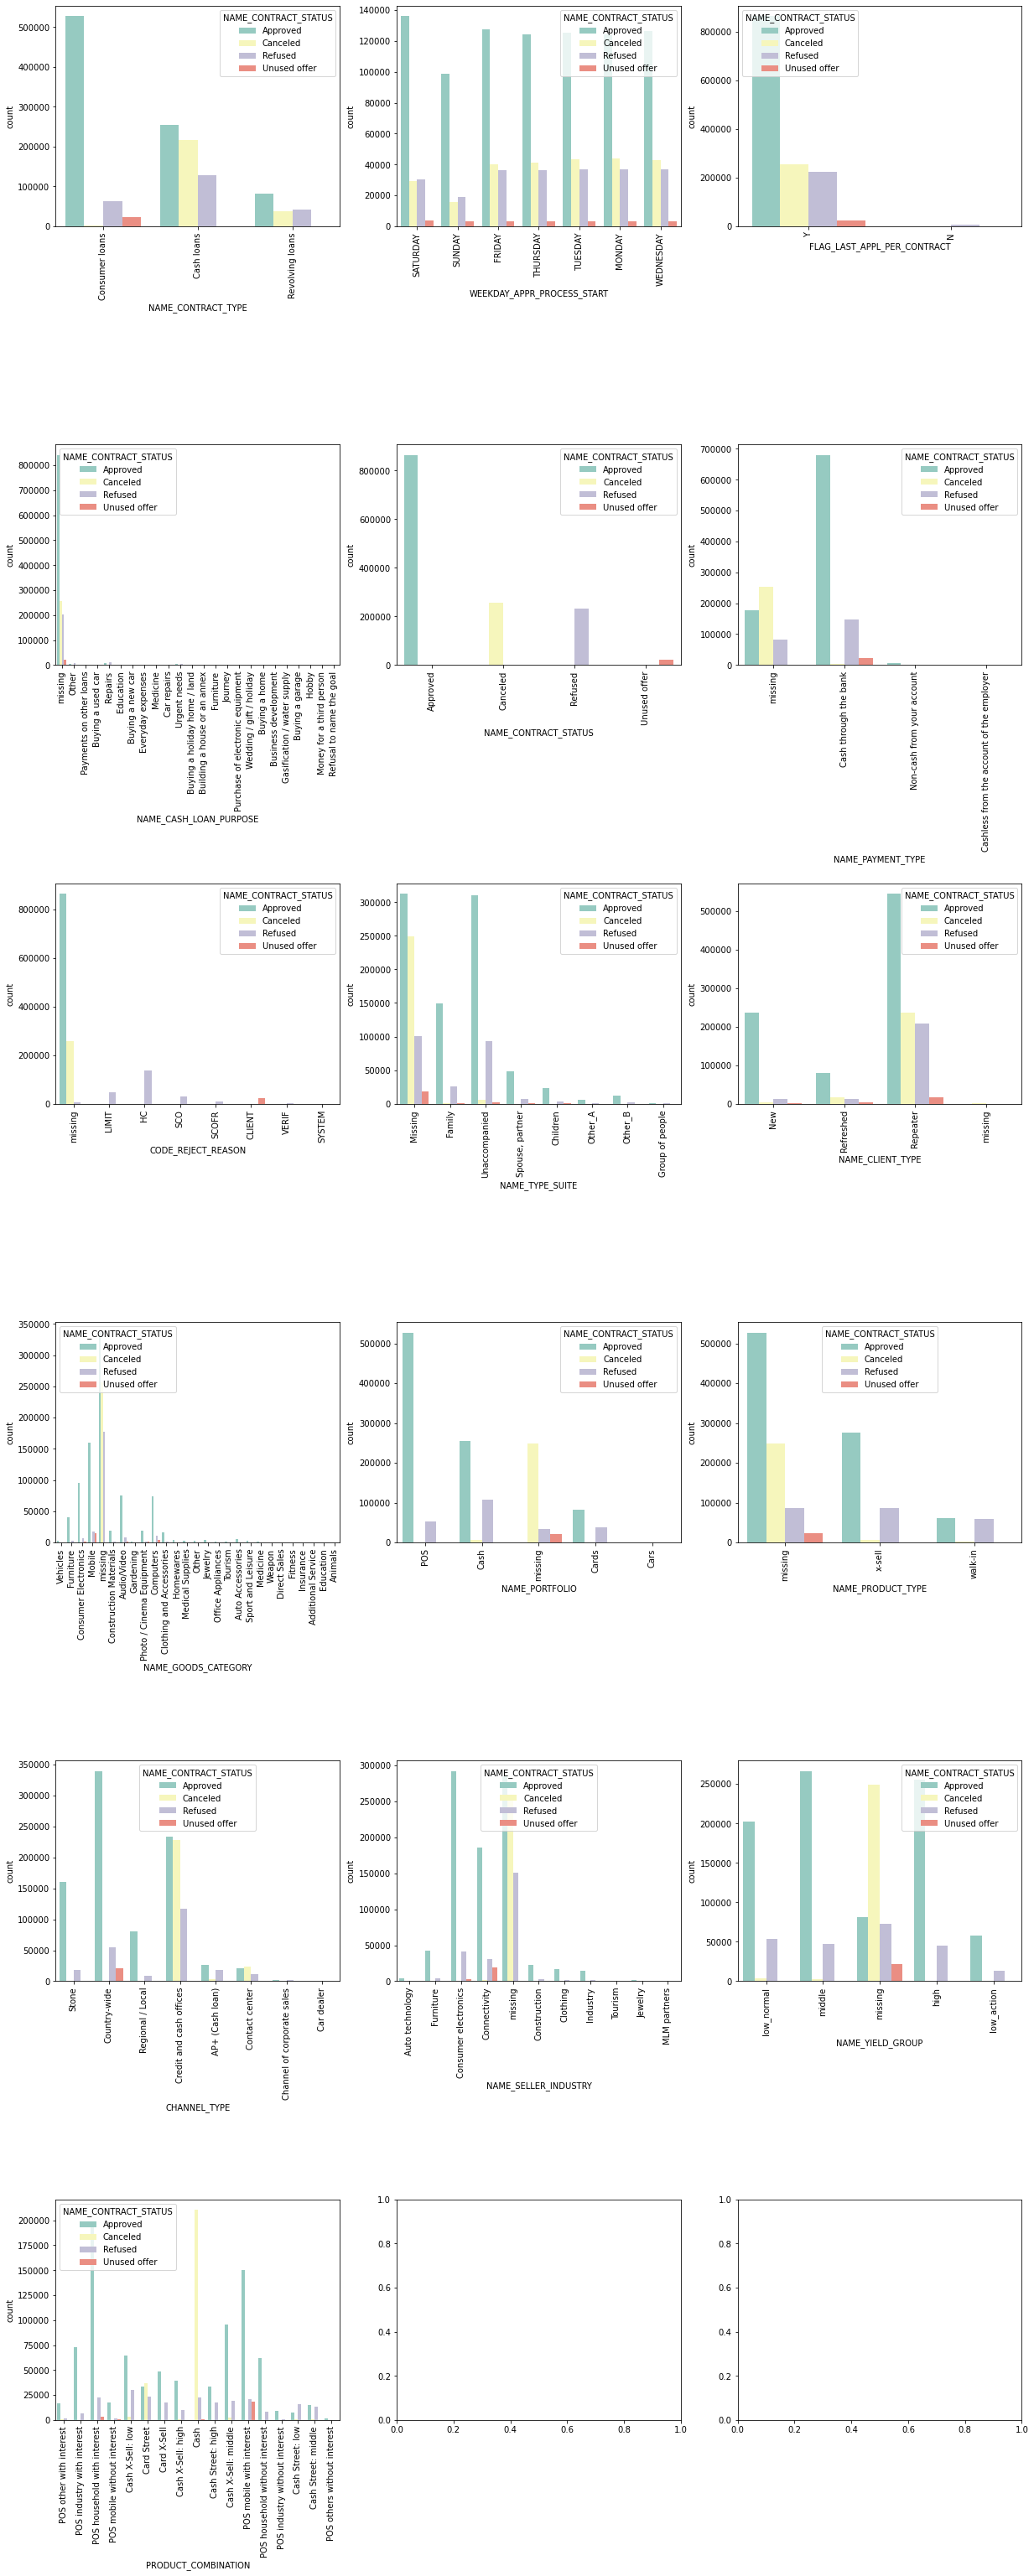

In [93]:
### lets see how these categorical columns are behaving compare to 'NAME_CONTRACT_STATUS'

### "NAME_CONTRACT_STATUS" vs "Each categorical columns"
fig, ax = plt.subplots(6,3, figsize = (20,50))
counter=0
for i in merge_data_object_data:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=merge_data,hue="NAME_CONTRACT_STATUS",palette="Set3")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.99)   
    counter+=1
plt.show()

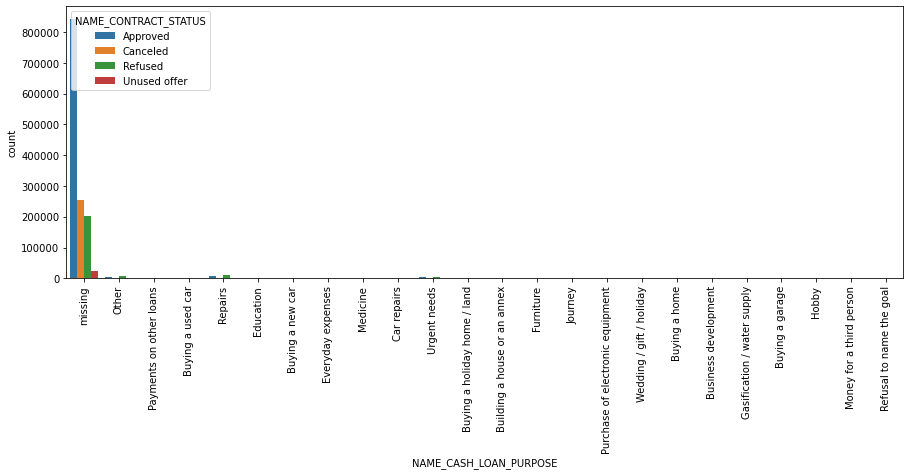

In [94]:
## some plots are not clearly visible so lets draw them separetly
plt.figure(figsize=[15,5])
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=merge_data,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

### observation
<li>this column don't provide any usefill insight,but we can assume that  privious_clients who don't provide there perpose are taking the loans more and also there approving rate is high</li>

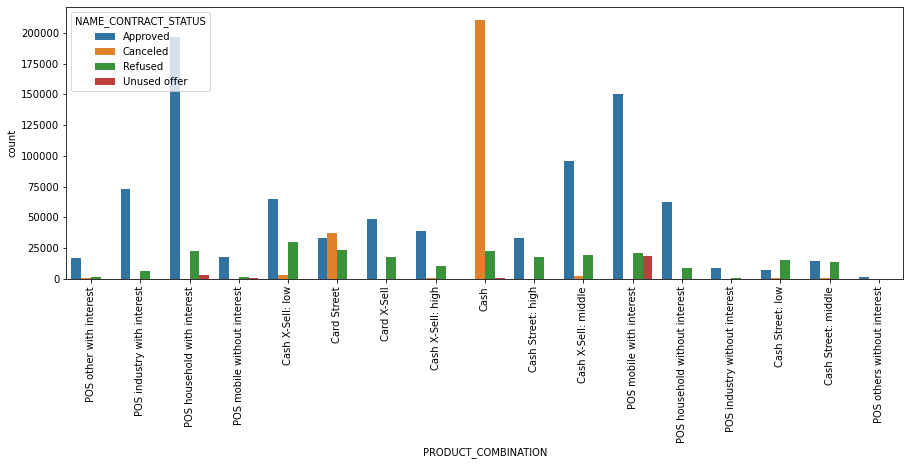

In [95]:
plt.figure(figsize=[15,5])
sns.countplot(x='PRODUCT_COMBINATION',data=merge_data,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

### observation
<li>Those privious_clients whose product_combination is 'Cash' there cancel rate was high then approving rate</li>
<li>product_combination with 'POS household with interest' and 'POS mobile  with interest' are high approving rate </li>

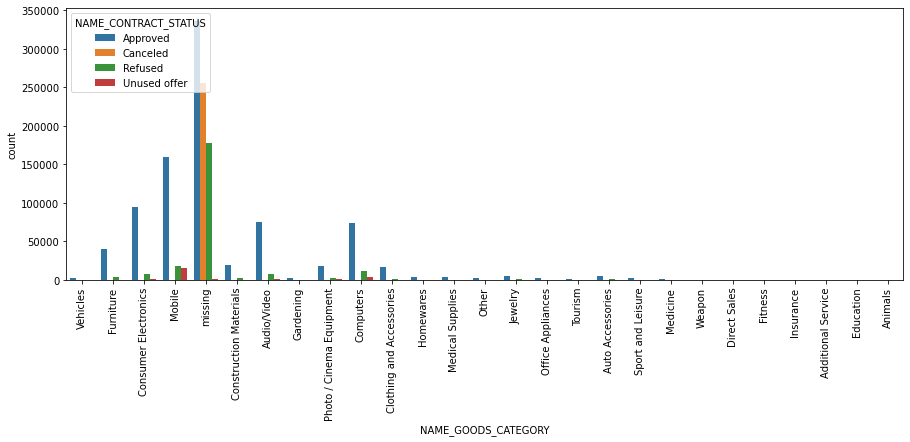

In [96]:
plt.figure(figsize=[15,5])
sns.countplot(x='NAME_GOODS_CATEGORY',data=merge_data,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

### observation
<li>privious_clients whose kind of goods is 'mobile','electronics' there approving rate is more </li>

### observation
<ol>
<li>Most privious_clients are taking 'consumers loans' CONTRACT_TYPE  also there approving rate was high</li>
<li>Those privious_clients whose NAME_PAYMENT_TYPE is 'cash through the bank' were high approving rate then other types</li>
<li>Those privious_clients whose CHENNEL_TYPE is credit and cash office were high cancel rate </li>
</ol>

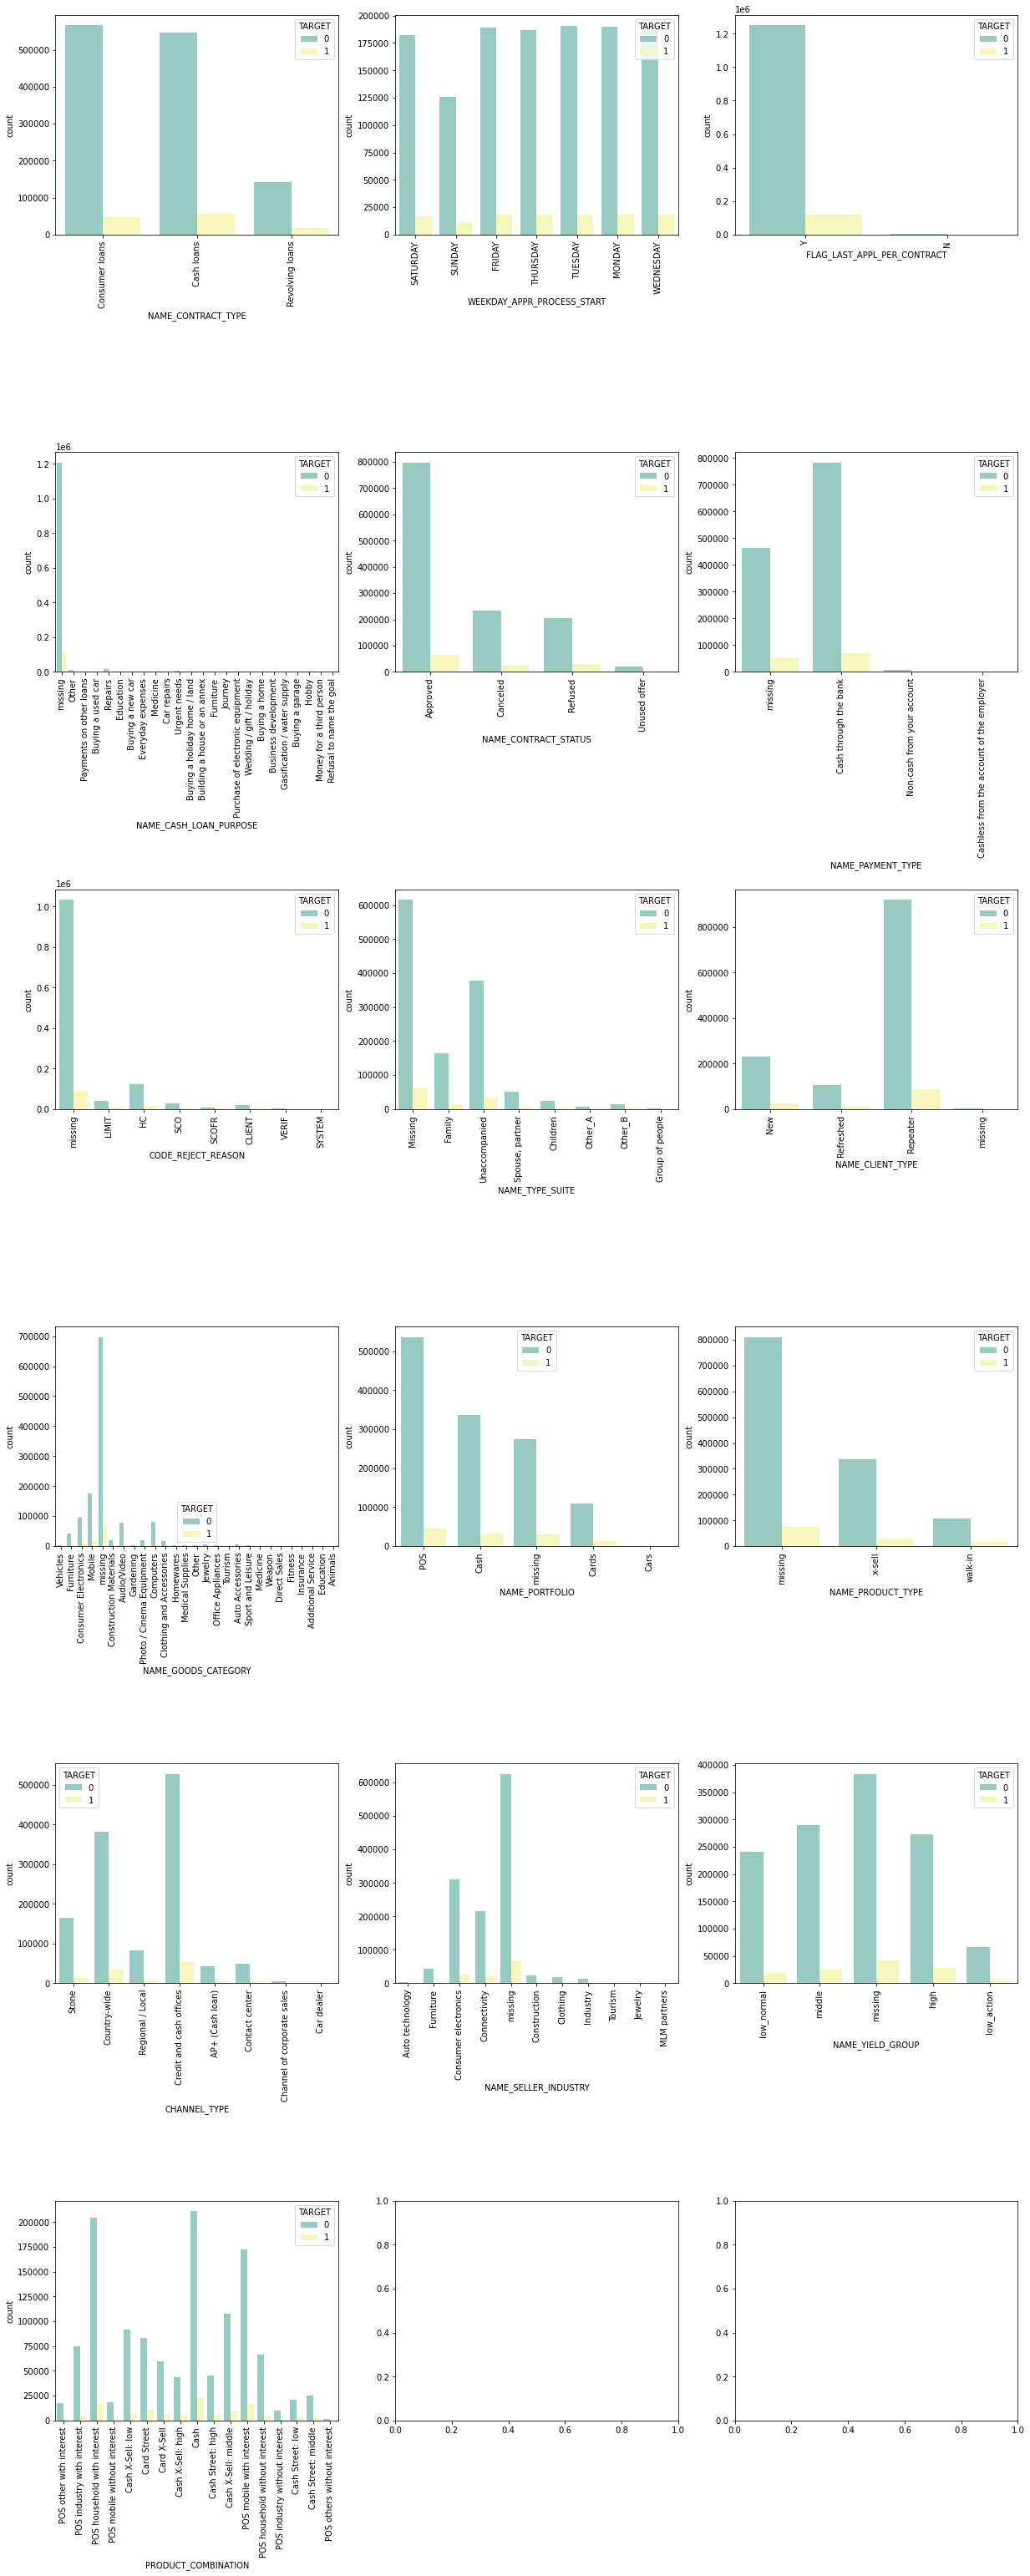

In [97]:
###NOW  lets see how these categorical columns are behaving towards 'TARGET'

### "NAME_CONTRACT_STATUS" vs "Each categorical columns"
fig, ax = plt.subplots(6,3, figsize = (20,50))
counter=0
for i in merge_data_object_data:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=merge_data,hue="TARGET",palette="Set3")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.99)
    counter+=1
plt.show()

In [98]:
### lets  define a function which give the percentage of defaulter for each category  in a column 
def merge_data_default_rate(x):
    ## in  the position of x give the name of column  in parenthesis which you want to analysis
    value=[]
    percentage_defaulting=[]
    for i in merge_data[x].unique():
        if (merge_data[(merge_data[x]==i)].shape[0]) !=  0:
            percentage_defaulting.append((merge_data[(merge_data[x]==i)&(merge_data.TARGET==1)].shape[0])/(merge_data[(merge_data[x]==i)].shape[0])*100)
            value.append(i)
    print(pd.DataFrame({'value':value,'percentage_defaulting':percentage_defaulting}))

    
    

#### NOW LETS ANALYSE THESE TOP 5 INSIGHTFULL COLUMNS IN PRIVIOUS_APPLICATION DATA    
a=['NAME_PORTFOLIO','CHANNEL_TYPE',"PRODUCT_COMBINATION",'CODE_REJECT_REASON','NAME_CONTRACT_STATUS']




### LETS PRINT THE DEFAULT RATE  FOR EACH CATEGORY FOR THESE TOP 5 COLUMNS 
for i in a:
    print(f'{i} vs defaulting rate')
    print()
    merge_data_default_rate(i)
    print('*'*100)
    print()

NAME_PORTFOLIO vs defaulting rate

     value  percentage_defaulting
0      POS               7.682131
1     Cash               9.002508
2  missing               9.742343
3    Cards              10.195371
4     Cars               0.000000
****************************************************************************************************

CHANNEL_TYPE vs defaulting rate

                        value  percentage_defaulting
0                       Stone               7.405775
1                Country-wide               8.289771
2            Regional / Local               7.672615
3     Credit and cash offices               9.086342
4             AP+ (Cash loan)              12.900225
5              Contact center              10.489523
6  Channel of corporate sales               5.792489
7                  Car dealer               0.000000
****************************************************************************************************

PRODUCT_COMBINATION vs defaulting rate

       

# observation
<li>‘SCO’, ‘LIMIT’ and ‘HC’ are the most common reason of rejection.</li>
<li>Those clients whom previous application was refused the defaulting rate was high around 13% and whom previous application was approved there defaulting rate was less around 8%</li>
<li>Most of the people did not request insurance during previous loan application.</li>
<li>For “Cards” defaulter percentage is highest (10%). ‘NAME_PORTFOLIO’ is an important feature for analyzing ‘TARGET’ variable.</li>
<li>12% loan applicatiant defaulted for AP+ (Cash Loan). ‘CHANNEL_TYPE’ is an important feature for analyzing ‘TARGET’ variable.</li>
<li>These ‘PRODUCT_COMBINATION’ are more then 10% defaulting rate  Cash Street: middle,Cash Street: low,Cash Street: high,Cash X-Sell: high,Card Street.‘PRODUCT_COMBINATION’ is an important driving factor.</li>

In [99]:
print('*'*127)
print('*'*60+'THE END'+'*'*60)
print('*'*127)

*******************************************************************************************************************************
************************************************************THE END************************************************************
*******************************************************************************************************************************
